# Overfitting vs. Underfitting

**1. Setup and Baseline Model**

In [1]:
%%time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
# ignore warnings in the output
import warnings
warnings.filterwarnings("ignore")

CPU times: total: 8.81 s
Wall time: 16.1 s


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Define a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the baseline model
history_baseline = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8122 - loss: 9.6627 - val_accuracy: 0.8951 - val_loss: 0.4940
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9052 - loss: 0.4082 - val_accuracy: 0.9203 - val_loss: 0.3746
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9219 - loss: 0.3095 - val_accuracy: 0.9255 - val_loss: 0.3204
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9340 - loss: 0.2471 - val_accuracy: 0.9327 - val_loss: 0.2666
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9413 - loss: 0.2201 - val_accuracy: 0.9347 - val_loss: 0.3054
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9417 - loss: 0.2217 - val_accuracy: 0.9336 - val_loss: 0.3381
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9463 - loss: 0.2091 - val_accuracy: 0.9426 - val_loss: 0.2670
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9512 - loss: 0.19

## 2. Run model on Normalized Data

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.4924 - val_accuracy: 0.9516 - val_loss: 0.1680
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9602 - loss: 0.1403 - val_accuracy: 0.9647 - val_loss: 0.1207
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9736 - loss: 0.0906 - val_accuracy: 0.9695 - val_loss: 0.1045
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0638 - val_accuracy: 0.9713 - val_loss: 0.0958
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9743 - val_loss: 0.0881
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9730 - val_loss: 0.0929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9767 - val_loss: 0.0836
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9937 - loss: 0.0223 

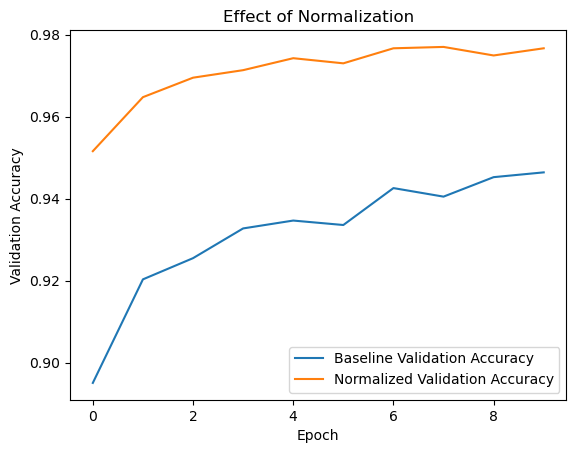

CPU times: total: 1min 52s
Wall time: 1min 30s


In [3]:
%%time
# laod and normalize the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model for normalized data
def create_model_with_norm_data():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_norm_data = create_model_with_norm_data()

# Train the baseline model
history_norm_data = model_with_norm_data.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plot the effect of normalization
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label = 'Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()